# Introduction to regression with NN in Tensorflow

A bit of simplification: predicting a numerical variable based on some other combination of variables... predicting a number  

In [1]:
!python -m pip install --upgrade pip
!pip install tensorflow
!pip install numpy matplotlib pydot graphviz

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


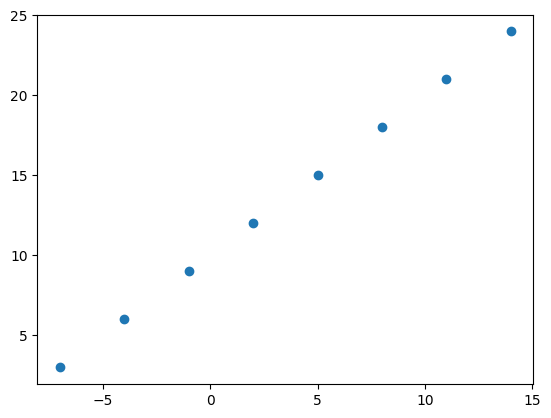

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

## Input and Output Shapes

In [4]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    #optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)


model.fit(
    tf.expand_dims(X, axis=-1), 
    y, 
    epochs=100
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 14.3245 - mae: 14.3245
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 11.9074 - mae: 11.9074
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 10.3030 - mae: 10.3030
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 8.9520 - mae: 8.9520
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 7.3226 - mae: 7.3226
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 5.3676 - mae: 5.3676
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 4.0009 - mae: 4.0009
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 4.7336 - mae: 4.7336
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 5.3431 - mae: 5.3431
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 5.4165 - mae: 5.4165
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 5.1092 - mae: 5.1092
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 4.5214 - mae: 4.5214
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [7]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[28.171606]], dtype=float32)

Basis (5 epochs, SGD, 1 layer)

loss: 10.6236 - mae: 10.6236


v2 (100 epochs, SGD, 1 layer)

loss: 6.9394 - mae: 6.9394

v2.1(1000 epochs, SGD, 1 layer)

loss: 1.8018 - mae: 1.8018


v3(100 epochs, Adam(0.1), 1 layer)

 loss: 0.6356 - mae: 0.6356
 
v4(100 epochs, SGD, 2 layer (100relu, 1)
loss: 3.7330 - mae: 3.7330

v5(100 epochs, SGD, 3 layer (100relu, 100relu, 1)
loss: 3.5979 - mae: 3.5979



In [8]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [9]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

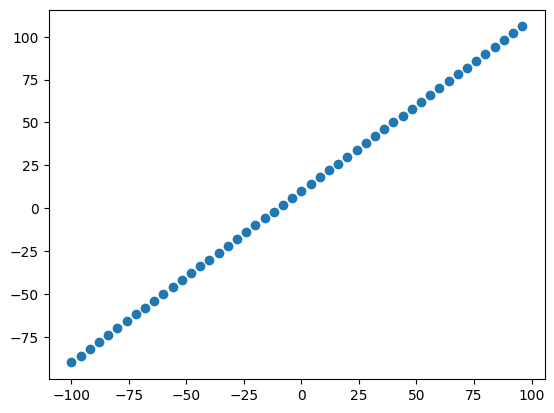

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [11]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

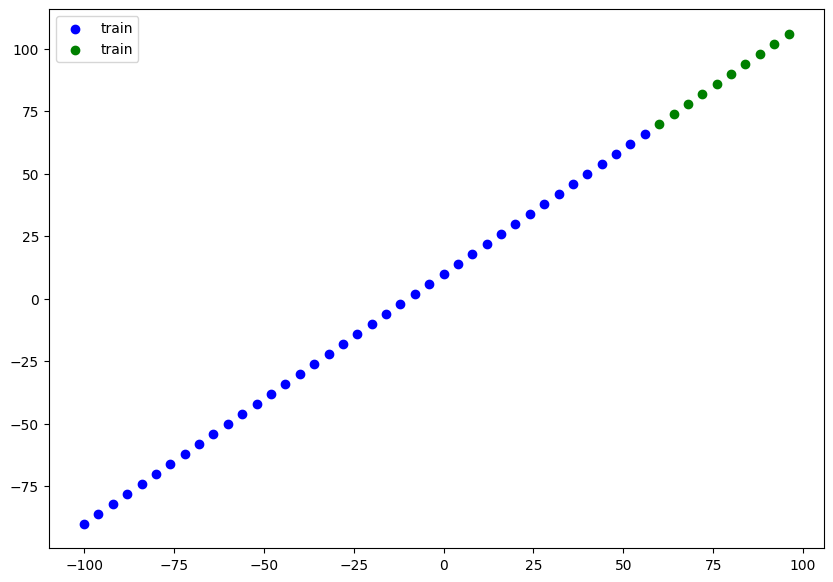

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='train')
plt.scatter(X_test, y_test, c='g', label='train')
plt.legend()

In [23]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)


model.fit(
    tf.expand_dims(X_train, axis=-1), 
    y_train, 
    epochs=100
)

model.summary()

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 21.7718 - mae: 21.7718 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.9988 - mae: 8.9988
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.5021 - mae: 11.5021
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.1321 - mae: 9.1321
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.0123 - mae: 8.0123
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6122 - mae: 7.6122
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6280 - mae: 7.6280
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.3560 - mae: 7.3560
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5210 - mae: 6.5210
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.5864 - mae: 6.5864
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9986 - mae: 5.9986
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1783 - mae: 6.1783
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21m

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

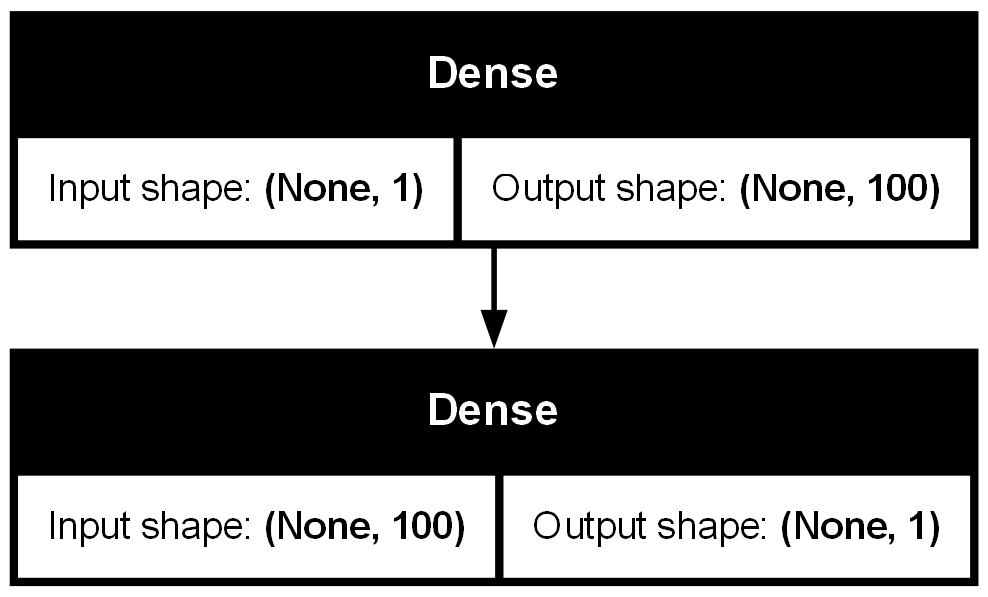

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [25]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[ 69.776184],
       [ 73.75688 ],
       [ 77.737564],
       [ 81.71825 ],
       [ 85.69893 ],
       [ 89.6796  ],
       [ 93.6603  ],
       [ 97.64098 ],
       [101.621666],
       [105.60234 ]], dtype=float32)

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

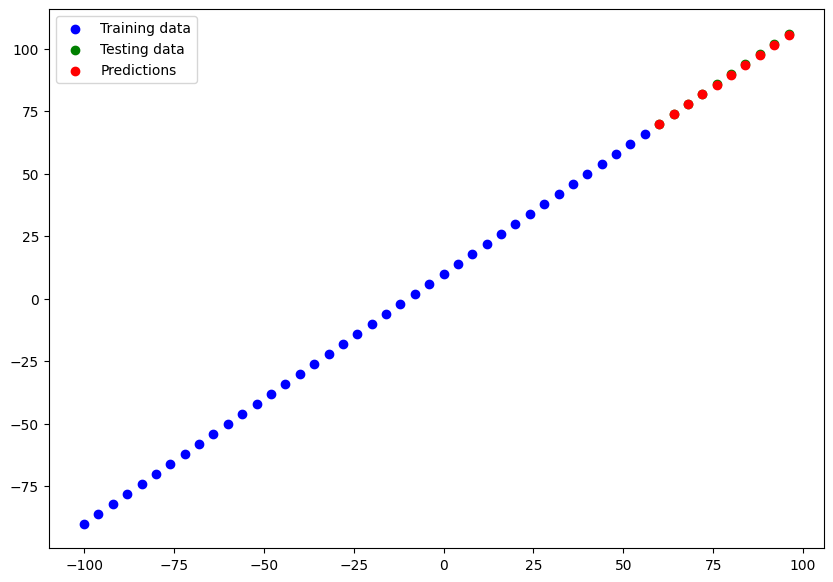

In [27]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    
    
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [28]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.3107 - mae: 0.3107


[0.31072998046875, 0.31072998046875]

In [36]:
mae = tf.metrics.mae(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.22381592, 0.24311829, 0.2624359 , 0.28175354, 0.30107117,
       0.32039642, 0.3396988 , 0.35901642, 0.37833405, 0.3976593 ],
      dtype=float32)>

In [37]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.776184,  73.75688 ,  77.737564,  81.71825 ,  85.69893 ,
        89.6796  ,  93.6603  ,  97.64098 , 101.621666, 105.60234 ],
      dtype=float32)>

In [39]:
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.31072998046875>

In [41]:
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.09963130950927734>